# Importing libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Datasets as DS
import phate
import DownstreamAnalysis as DA
from sklearn.metrics.pairwise import euclidean_distances

# Loading data

In [3]:
dir = 'D:/Research/NeuroDAVIS/Results/HD/Comparison/'
X,y = DS.LoadData('Usoskin')

In [4]:
X.shape

(621, 4184)

In [5]:
y = y.reshape((y.shape[0],))

In [6]:
c1=list(np.unique(y))
c2=['blue', 'green', 'orange', 'red', 'yellow',
    'pink', 'purple', 'aquamarine', 'gray', 'darkgreen',
    'skyblue', 'lime', 'royalblue' , 'cyan', 'olive',
    'tomato', 'saddlebrown', 'sienna', 'navy', 'violet',
    'crimson', 'greenyellow','coral','burlywood','slategrey']
cols = map(lambda x: c2[c1.index(x)], y)
cs = [i for i in list(cols)]

# Applying Phate

In [7]:
X_phate = phate.PHATE().fit_transform(X)

Calculating PHATE...
  Running PHATE on 621 observations and 4184 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.25 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.06 seconds.
    Calculating affinities...
    Calculated affinities in 0.21 seconds.
  Calculated graph and diffusion operator in 0.54 seconds.
  Calculating optimal t...
    Automatically selected t = 16
  Calculated optimal t in 0.30 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.03 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 0.19 seconds.
Calculated PHATE in 1.07 seconds.


# Plotting the results

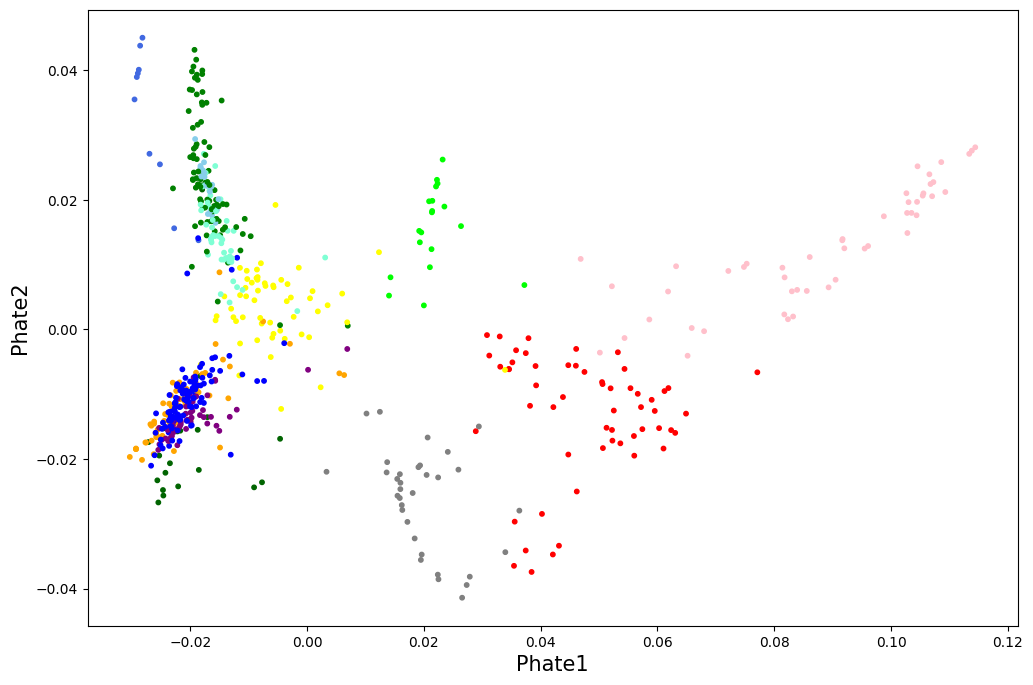

In [8]:
plt.figure(figsize=(12,8))
plt.scatter(X_phate[:,0],X_phate[:,1],c=cs,s=10)
plt.xlabel("Phate1", fontsize = 15)
plt.ylabel("Phate2", fontsize = 15)
plt.savefig(dir+'Usoskin_Phate.eps', dpi = 1200, format = 'eps')

# Spearman correlation

In [9]:
iteration = 10
score_phate = []
res_kmeans_phate = []
res_agglomerative_phate = []
dist_orig = np.square(euclidean_distances(X, X)).flatten()
for i in range(iteration):
    print("Iteration {}".format(i+1))
    #print("----Phate")
    X_phate = phate.PHATE().fit_transform(X)
    dist_method = np.square(euclidean_distances(X_phate, X_phate)).flatten()
    score_phate.append(DA.correlation(dist_orig, dist_method))
    res_kmeans_phate.append(DA.kmeans(X_phate, y))
    res_agglomerative_phate.append(DA.Agglomerative(X_phate, y))

Iteration 1
Calculating PHATE...
  Calculating graph and diffusion operator...
Calculating PCA...
Calculated PCA in 0.25 seconds.
Calculating KNN search...
Calculated KNN search in 0.06 seconds.
Calculating affinities...
Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.33 seconds.
  Calculating optimal t...
  Calculated optimal t in 0.31 seconds.
  Automatically selected t = 15
  Calculating diffusion potential...
  Calculated diffusion potential in 0.04 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 2.31 seconds.
Calculated PHATE in 3.00 seconds.
Iteration 2
Calculating PHATE...
  Calculating graph and diffusion operator...
Calculating PCA...
Calculated PCA in 0.23 seconds.
Calculating KNN search...
Calculated KNN search in 0.06 seconds.
Calculating affinities...
Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.31 seconds.
  Calculating optimal t...
  Calculated optimal t in 0.32 seconds.
  Auto

In [10]:
result = pd.DataFrame(score_phate,columns =['Phate'])
result

,Phate
0,-0.125827
1,-0.121804
2,-0.119657
3,-0.124787
4,-0.124278
5,-0.120063
6,-0.122345
7,-0.122522
8,-0.119958
9,-0.121903


In [11]:
pd.DataFrame(res_kmeans_phate,columns =['ARI','FMI','NMI','Silhouette_score','Davies_bouldin_score'])

,ARI,FMI,NMI,Silhouette_score,Davies_bouldin_score
0,0.350941,0.422963,0.622864,0.469354,0.654385
1,0.358419,0.431965,0.616993,0.466189,0.659910
2,0.348914,0.422117,0.621988,0.487453,0.669207
3,0.350640,0.425713,0.625649,0.465276,0.676471
4,0.351966,0.425573,0.614153,0.481078,0.638747
5,0.345226,0.419073,0.607961,0.460538,0.663436
6,0.353521,0.427710,0.622725,0.476279,0.648383
7,0.332520,0.408701,0.607439,0.484074,0.652295
8,0.340823,0.414728,0.611560,0.452967,0.688863
9,0.353486,0.427213,0.619060,0.464981,0.691063


In [12]:
pd.DataFrame(res_agglomerative_phate,columns =['ARI','FMI','NMI','Silhouette_score','Davies_bouldin_score'])

,ARI,FMI,NMI,Silhouette_score,Davies_bouldin_score
0,0.351504,0.426029,0.625853,0.463777,0.729056
1,0.391595,0.478849,0.637192,0.468937,0.652204
2,0.359734,0.432746,0.633418,0.472086,0.667345
3,0.361654,0.440654,0.636830,0.451252,0.714965
4,0.361712,0.434785,0.607479,0.437104,0.658830
5,0.337062,0.414303,0.604528,0.443657,0.653108
6,0.390827,0.466844,0.621859,0.426199,0.674513
7,0.332761,0.412991,0.606468,0.460442,0.692893
8,0.395973,0.480556,0.640107,0.443938,0.624837
9,0.367102,0.443917,0.622161,0.446397,0.722543
